<a href="https://colab.research.google.com/github/RitvikPrabhu/Machine-Learning/blob/master/ComputerVision/Clothing_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

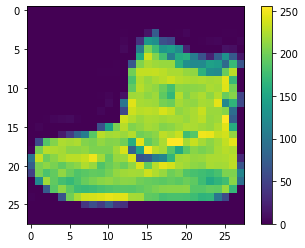

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

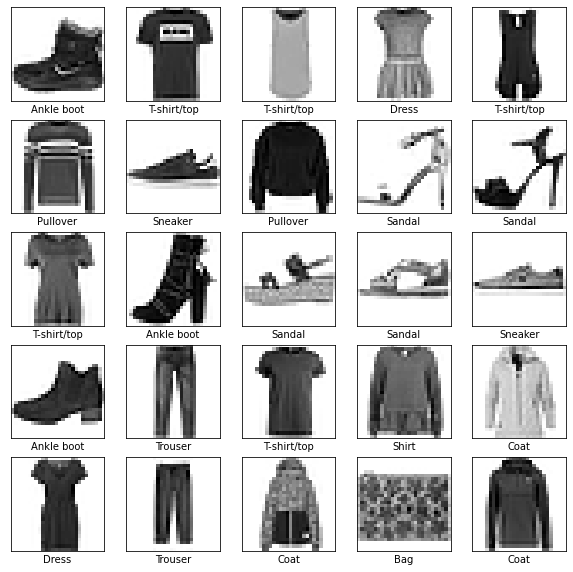

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
es = EarlyStopping(monitor='accuracy', mode = 'max', verbose=1, patience = 20, restore_best_weights=True, min_delta=0.05)
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4928 - accuracy: 0.5590
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6622 - accuracy: 0.7651
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5760 - accuracy: 0.7926
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5258 - accuracy: 0.8141
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4980 - accuracy: 0.8229
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4734 - accuracy: 0.8318
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4497 - accuracy: 0.8416
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4465 - accuracy: 0.8430
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4330 - accuracy: 0.8468
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.427

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4134 - accuracy: 0.8516

Test accuracy: 0.8515999913215637


In [30]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

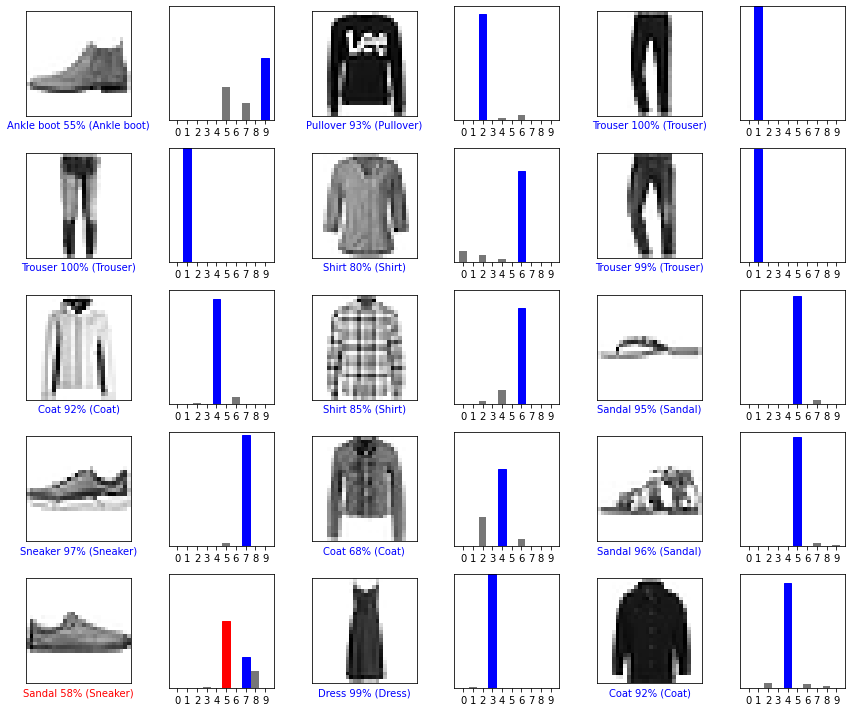

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

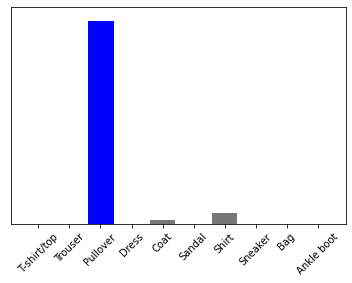

In [43]:
img = test_images[1]
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)